In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

# Dataset

Asaniczka. (2025). Forex Exchange Rates Since 2004 (Updated Daily) [Data set]. Kaggle.

Website: https://www.kaggle.com/datasets/asaniczka/forex-exchange-rate-since-2004-updated-daily

DOI: 10.34740/kaggle/dsv/10558683

In [2]:
# Read the "Daily Forex Rate" csv file from a google drive directory

from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Colab/P1: Forex Regression/daily_forex_rates.csv'

df = pd.read_csv(file_path)
df

Mounted at /content/drive


,currency,base_currency,currency_name,exchange_rate,date
0,ZWL,EUR,Zimbabwean Dollar,333.100155,2025-01-21
1,GHS,EUR,Ghanaian Cedi,15.476757,2025-01-21
2,HRK,EUR,Croatian Kuna,7.633949,2025-01-21
3,HNL,EUR,Honduran Lempira,26.201750,2025-01-21
4,HKD,EUR,Hong Kong Dollar,8.054134,2025-01-21
...,...,...,...,...,...
398371,JPY,EUR,Japanese Yen,133.350000,2004-09-01
398372,CAD,EUR,Canadian Dollar,1.596700,2004-08-31
398373,JPY,EUR,Japanese Yen,132.850000,2004-08-31
398374,AUD,EUR,Australian Dollar,1.729600,2004-08-31


In [3]:
# Filter for currency 'IDR'
df_idr = df[df['currency'] == 'IDR']

# Sort by date
df_idr_sorted = df_idr.sort_values(by='date')

df_idr_sorted

,currency,base_currency,currency_name,exchange_rate,date
375440,IDR,EUR,Indonesian Rupiah,15107.000000,2014-11-24
375300,IDR,EUR,Indonesian Rupiah,15218.000000,2014-11-25
375189,IDR,EUR,Indonesian Rupiah,15270.000000,2014-11-26
375078,IDR,EUR,Indonesian Rupiah,15155.000000,2014-11-27
374842,IDR,EUR,Indonesian Rupiah,15241.000000,2014-11-28
...,...,...,...,...,...
691,IDR,EUR,Indonesian Rupiah,16900.133320,2025-01-17
601,IDR,EUR,Indonesian Rupiah,16896.841442,2025-01-18
365,IDR,EUR,Indonesian Rupiah,16896.841442,2025-01-19
235,IDR,EUR,Indonesian Rupiah,16867.854127,2025-01-20


In [42]:
# Export to Google Drive as a CSV file (Only for IDR rates)
df_idr_sorted.to_csv('/content/drive/MyDrive/Colab/P1: Forex Regression/daily_forex_rates_idr.csv', index=False)

monthly_idr = df_idr_sorted[df_idr_sorted.index.day == 1]
monthly_idr.to_csv('/content/drive/MyDrive/Colab/P1: Forex Regression/monhtly_forex_rates.csv', index=False)

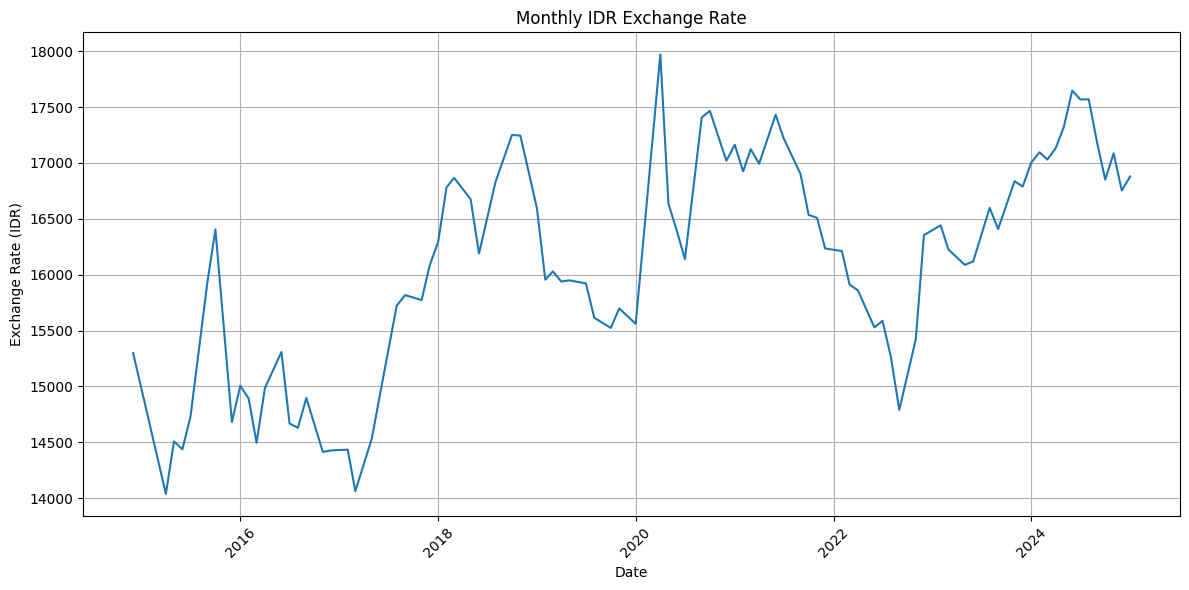

In [43]:
# For plotting, limit it to only show monthly change (for every date 1 every month). After that plot the exchange rate

# Convert 'date' column to datetime objects
df_idr_sorted.index = pd.to_datetime(df_idr_sorted['date'])

# Resample to monthly frequency, taking the first value of each month
monthly_idr = df_idr_sorted[df_idr_sorted.index.day == 1]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_idr.index, monthly_idr['exchange_rate'])
plt.xlabel('Date')
plt.ylabel('Exchange Rate (IDR)')
plt.title('Monthly IDR Exchange Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Train, Valid and Test

In [21]:
# Train Valid Test Dataset here
d = df_idr_sorted
train, valid, test = np.split(d.sample(frac=1, random_state=42), [int(0.6*len(d)), int(0.8*len(d))])

# Assign X values and y values
X_train = train['date']
y_train = train['exchange_rate']
X_valid = valid['date']
y_valid = valid['exchange_rate']
X_test = test['date']
y_test = test['exchange_rate']

# Convert to datetime, then as numeric (integers)
X_train = X_train.astype('datetime64[ns]').astype(int)
X_valid = X_valid.astype('datetime64[ns]').astype(int)
X_test = X_test.astype('datetime64[ns]').astype(int)

len(X_train), len(X_valid), len(X_test)

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


(1666, 556, 556)

# Model 1: Using Simple Linear Regression

In [22]:
# Apply the linear regression
lr_model = LinearRegression()
X_train_2d = np.array(X_train).reshape(-1, 1) #Reshape first to 2D format
lr_model.fit(X_train_2d, y_train)

print("Coefficient: ", lr_model.coef_)
print("Intercept: ", lr_model.intercept_)
print("R2 Score: ", lr_model.score(X_train_2d, y_train))

Coefficient:  [6.99265951e-15]
Intercept:  4972.474694884006
R2 Score:  0.44560739323831655


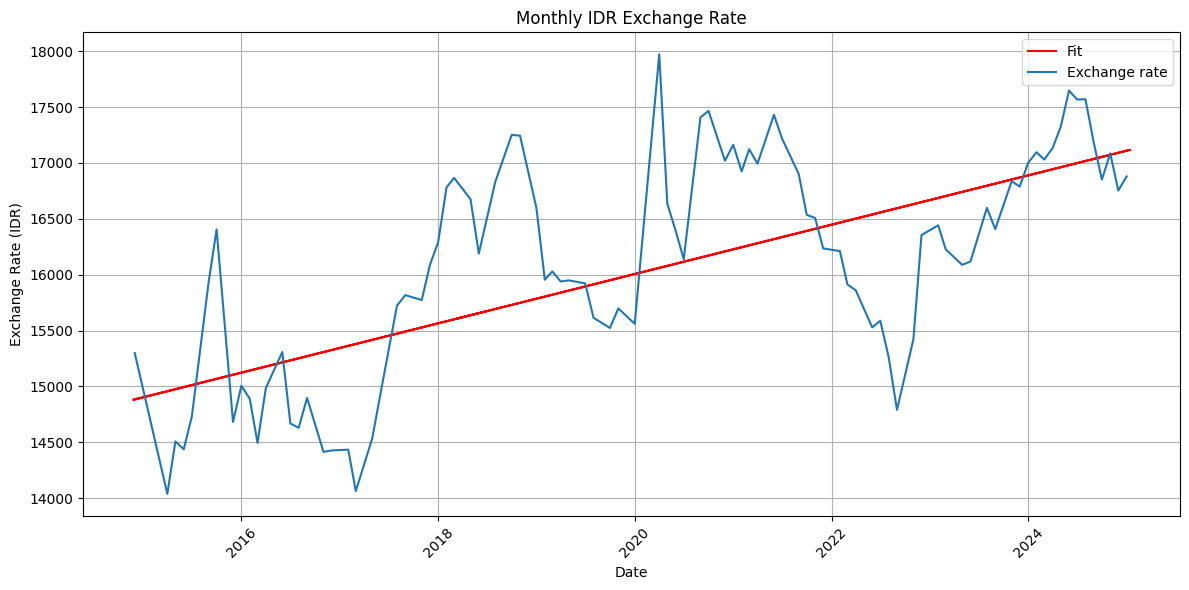

In [23]:
# Predict the model
y_pred = lr_model.predict(np.array(X_test).reshape(-1, 1))

X_test_asdate = X_test.astype('datetime64[ns]')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(X_test_asdate, y_pred, label = 'Fit', color = 'red')
plt.plot(monthly_idr.index, monthly_idr['exchange_rate'], label = 'Exchange rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate (IDR)')
plt.title('Monthly IDR Exchange Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

## Trying Manual Inputs
From Jan 2025 to Jan 2028

In [14]:
# Manually input dates to predict
dates_to_predict = np.array([['2025-01-01'],['2026-01-01'],['2027-01-01'],['2028-01-01'],['2029-01-01'],['2030-01-01']])
dates_to_predict_int = dates_to_predict.astype('datetime64[ns]').astype(int)

exrate_pred = lr_model.predict(dates_to_predict_int.reshape(-1, 1))
exrate_pred = np.round(exrate_pred).astype(int)

for i in range(len(dates_to_predict)):
  print(f"{dates_to_predict[i][0]} predicted rate: {exrate_pred[i]}")

2025-01-01 predicted rate: 17110
2026-01-01 predicted rate: 17330
2027-01-01 predicted rate: 17551
2028-01-01 predicted rate: 17771
2029-01-01 predicted rate: 17992
2030-01-01 predicted rate: 18213


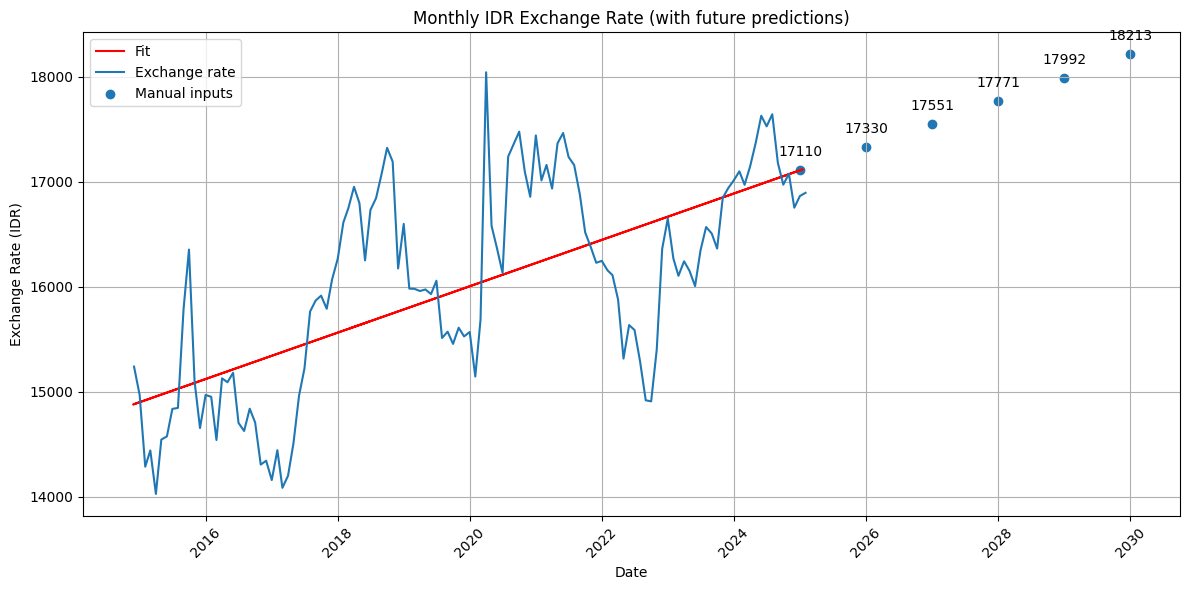

In [16]:
# Plotting the manual inputs
plt.figure(figsize=(12, 6))
plt.plot(X_test_asdate, y_pred, label = 'Fit', color = 'red')
plt.plot(monthly_idr.index, monthly_idr['exchange_rate'], label = 'Exchange rate')
plt.scatter(dates_to_predict, exrate_pred, label = 'Manual inputs')
plt.xlabel('Date')
plt.ylabel('Exchange Rate (IDR)')
plt.title('Monthly IDR Exchange Rate (with future predictions)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()

# Scatter plot with data labels
for i, txt in enumerate(exrate_pred):
    plt.annotate(txt, (dates_to_predict[i], exrate_pred[i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.show()

# Model 2: Using the ARIMA model to predict the trend

In [57]:
# Assigning Train and Test dataset again without randomization
train_size = int(0.8 * len(df_idr_sorted))
train_data = df_idr_sorted[:train_size]
test_data = df_idr_sorted[train_size:]

# Assign X values and y values
X_train = train_data['date']
y_train = train_data['exchange_rate']
X_test = test_data['date']
y_test = test_data['exchange_rate']

# Now you have train_data (80%) and test_data (20%) without any randomization
print(f"Train data length: {len(train_data)}")
print(f"Test data length: {len(test_data)}")

Train data length: 2222
Test data length: 556


In [96]:
# Get the X_train, y_train, X_test, and y_test dataset only on date 1 of each month

# Split the data into training, validation, and testing sets
train_size = int(0.8 * len(monthly_idr))
test_size = len(monthly_idr) - train_size

X = monthly_idr.index.astype('datetime64[ns]').values.reshape(-1,1)
y = monthly_idr['exchange_rate'].values

X_train_monthly = X[:train_size]
y_train_monthly = y[:train_size]
X_test_monthly = X[train_size:]
y_test_monthly = y[train_size:]

print(f"X_train shape: {X_train_monthly.shape}, y_train shape: {y_train_monthly.shape}")
print(f"X_test shape: {X_test_monthly.shape}, y_test shape: {y_test_monthly.shape}")

X_train shape: (73, 1), y_train shape: (73,)
X_test shape: (19, 1), y_test shape: (19,)


<Figure size 640x480 with 0 Axes>

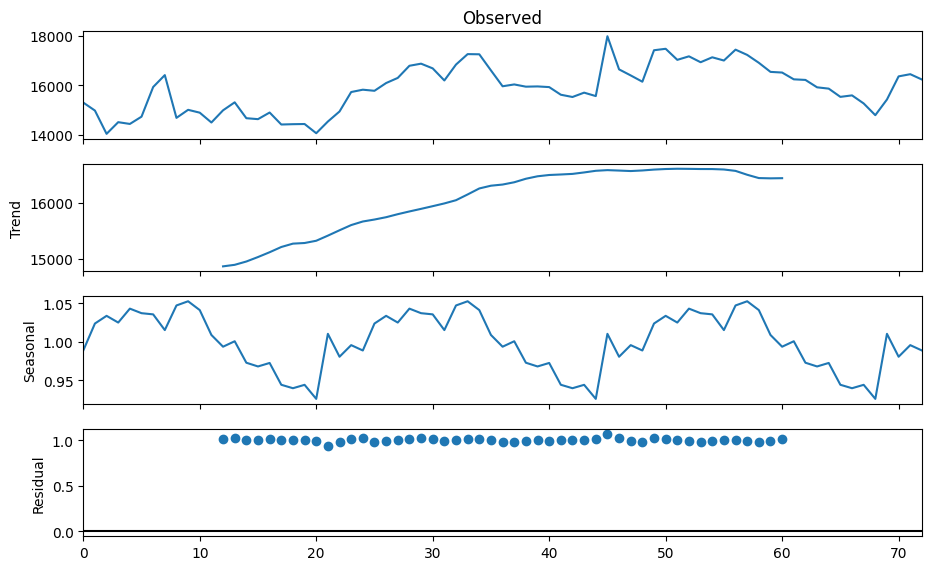

In [55]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(y_train_monthly, model='multiplicative', period=24)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(10, 6)
fig.show()

In [84]:
# !pip install pmdarima # download if not available yet
from pmdarima.arima import auto_arima

model = auto_arima(y_train_monthly, seasonal=True, m=12, suppress_warnings=True)
print(model.order)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

(2, 1, 2)


In [88]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score

results_table = pd.DataFrame(columns=["s_value", "mse_result", "r2_result"])

def seasonal_result(s_value):
  order = (2, 1, 2)  # Example order (p, d, q)
  seasonal_order = (2, 1, 2, s_value)  # Example seasonal order (P, D, Q, s)

  # Build the SARIMAX Model
  sarimax_model = SARIMAX(y_train_monthly, order=order, seasonal_order=seasonal_order)
  sarimax_results = sarimax_model.fit(disp=False)  # disp=False suppresses convergence messages

  # Predict the SARIMAX model with the test data
  y_pred = sarimax_results.predict(start=len(y_train_monthly), end=len(y_train_monthly) + len(y_test_monthly) - 1)

  # Calculate MSE and R2 for the SARIMAX model
  mse_sarimax = mean_squared_error(y_pred, y_test_monthly)
  r2_sarimax = r2_score(y_pred, y_test_monthly)

  # Assign to table
  results_table.loc[len(results_table)] = [s_value, mse_sarimax, r2_sarimax]

for i in range(4,13):
  seasonal_result(i)

results_table

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py

,s_value,mse_result,r2_result
0,4.0,2.853365e+05,-2.719891
1,5.0,8.514357e+05,-0.547675
2,6.0,8.072218e+05,-0.273058
3,7.0,5.564244e+05,-0.930726
4,8.0,1.319117e+05,0.065082
5,9.0,8.944682e+05,-9.397534
6,10.0,4.482496e+05,-2.569396
7,11.0,2.633898e+05,-3.350379
8,12.0,1.661100e+06,-16.845742


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


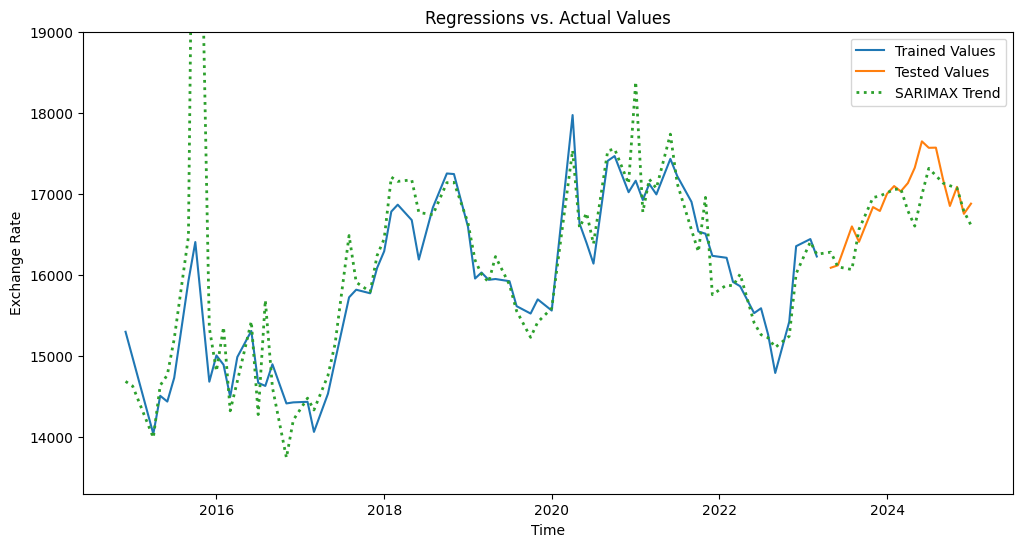

MSE: 808990.5599813338
R2: 0.5315788536443788


In [99]:
# The regression model will produce a trend with the lowest error with s_value = 8
order = (2, 1, 2)  # Example order (p, d, q)
seasonal_order = (2, 1, 2, 8)  # Example seasonal order (P, D, Q, s), use "8" as the s_value
sarimax_model = SARIMAX(y_train_monthly, order=order, seasonal_order=seasonal_order)
sarimax_results = sarimax_model.fit(disp=False)
y_sarimax_trend = sarimax_results.predict(start=1, end=len(y_train_monthly) + len(y_test_monthly))
y_actual_combined = np.concatenate((y_train_monthly, y_test_monthly))

# Plotting the SARIMAX trend
plt.figure(figsize=(12, 6))
plt.plot(X_train_monthly, y_train_monthly, label = 'Trained Values')
plt.plot(X_test_monthly, y_test_monthly, label = 'Tested Values')
plt.plot(monthly_idr.index, y_sarimax_trend, label='SARIMAX Trend', linestyle='dotted', linewidth=2)
plt.ylim(13300,19000)
plt.xlabel('Time')
plt.ylabel('Exchange Rate')
plt.title('Regressions vs. Actual Values')
plt.legend()
plt.show()

print(f"MSE: {mean_squared_error(y_sarimax_trend, y_actual_combined)}")
print(f"R2: {r2_score(y_sarimax_trend, y_actual_combined)}")